In [1]:
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\auto_pipeline.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# Ma'lumot faylining manzili
data_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection\Filtered_Features.csv"

try:
    logging.info("Ma'lumot fayli yuklanmoqda...")
    df = DataLoader.load_csv(data_path)
    logging.info(f"Fayl muvaffaqiyatli yuklandi. Satrlar soni: {len(df)}, ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"Ma'lumot faylini yuklashda xatolik yuz berdi: {e}")

In [3]:
import sys
import os
import importlib

# 1. path qo‘shish
source_path = r'C:\Users\Rasulbek907\Desktop\Project_MP\Source'
if source_path not in sys.path:
    sys.path.append(source_path)

# 2. Import va reload
import pipeline
importlib.reload(pipeline)  # 🔄 MUHIM: o‘zgargan faylni yangilaydi

# 3. DataLoader ni olish
from pipeline import DataLoader

# 4. Foydalanish
data_path = r'C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection\Filtered_Features.csv'
loader = DataLoader(data_path)

# 5. Endi ishlaydi!
df = loader.load_dataset()
print(df.head()) 

   Unnamed: 0        id       ref  subtitle  creatorname  totalbytes  \
0           0  1.652531 -1.497901 -1.343173    -1.482264   -0.205871   
1           1  1.608563 -1.581849  0.951414    -1.578557   -0.205876   
2           2  1.672062 -1.224657 -0.147321    -1.218896   -0.205877   
3           3  1.690704 -1.434528 -1.140709    -1.420537   -0.205814   
4           4  1.583257 -1.599133 -1.353049    -1.588433   -0.205741   

   lastupdated  downloadcount     title      tags  ...   anomaly  \
0     1.440289      -0.334293 -1.148158 -1.305056  ...  0.333377   
1     1.295437       0.105377 -0.349943  0.271367  ...  0.333377   
2     1.522592      -0.276472  0.955542  1.099529  ...  0.333377   
3     1.599133      -0.329493 -1.527142 -0.562436  ...  0.333377   
4     1.204905       0.203582 -1.403888 -0.790862  ...  0.333377   

   download_view_ratio  num_tags  title_length  subtitle_length  \
0             0.054731  0.644314      0.521569         1.310725   
1             0.015678  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4209 non-null   int64  
 1   id                   4209 non-null   float64
 2   ref                  4209 non-null   float64
 3   subtitle             4209 non-null   float64
 4   creatorname          4209 non-null   float64
 5   totalbytes           4209 non-null   float64
 6   lastupdated          4209 non-null   float64
 7   downloadcount        4209 non-null   float64
 8   title                4209 non-null   float64
 9   tags                 4209 non-null   float64
 10  cluster              4209 non-null   int64  
 11  anomaly              4209 non-null   float64
 12  download_view_ratio  4209 non-null   float64
 13  num_tags             4209 non-null   float64
 14  title_length         4209 non-null   float64
 15  subtitle_length      4209 non-null   f

In [5]:
df.head()


,Unnamed: 0,id,ref,subtitle,creatorname,totalbytes,lastupdated,downloadcount,title,tags,...,anomaly,download_view_ratio,num_tags,title_length,subtitle_length,creator_popularity,owner_popularity,lastupdated_month,lastupdated_day,lastupdated_weekday
0,0,1.652531,-1.497901,-1.343173,-1.482264,-0.205871,1.440289,-0.334293,-1.148158,-1.305056,...,0.333377,0.054731,0.644314,0.521569,1.310725,0.0,-0.06614,0.890462,0.152226,0.535769
1,1,1.608563,-1.581849,0.951414,-1.578557,-0.205876,1.295437,0.105377,-0.349943,0.271367,...,0.333377,0.015678,0.321751,1.770817,0.682214,0.0,-0.06614,0.890462,-1.626624,-0.467145
2,2,1.672062,-1.224657,-0.147321,-1.218896,-0.205877,1.522592,-0.276472,0.955542,1.099529,...,0.333377,0.080659,0.063700,0.789265,0.853626,0.0,-0.06614,0.890462,1.152829,1.538684
3,3,1.690704,-1.434528,-1.140709,-1.420537,-0.205814,1.599133,-0.329493,-1.527142,-0.562436,...,0.333377,0.141278,0.708827,0.253873,0.796489,0.0,-0.06614,1.189175,-1.515446,1.538684
4,4,1.583257,-1.599133,-1.353049,-1.588433,-0.205741,1.204905,0.203582,-1.403888,-0.790862,...,0.333377,0.161541,0.902365,0.878497,1.310725,0.0,-0.06614,0.591749,0.485760,1.037227


In [8]:
from auto_pipeline import PlayerPipeline
from xgboost import XGBClassifier 

# Avto Pipeline RandomForestRegressor

In [9]:
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, r2_score

pipeline_xgb = PlayerPipeline(
    df=df,
    target="cluster",
    model=XGBClassifier(
        n_estimators=100,
        use_label_encoder=False,  
        eval_metric='mlogloss'    
    )
)
pipeline_xgb.fit()
y_pred = pipeline_xgb.predict()

accuracy = accuracy_score(df["cluster"], y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [10]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\XGB_Pipeline.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_xgb, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}") 

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\XGB_Pipeline.joblib


# Avto Pipeline DecisionTreeRegressor

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


pipeline_rf = PlayerPipeline(df=df, target="cluster", model=RandomForestClassifier())
pipeline_rf.fit()
y_pred = pipeline_rf.predict()


accuracy = pipeline_rf.score() 
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 1.0


In [12]:
import joblib
import os

model_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\RandomForestClassifier.joblib"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(pipeline_rf, model_path)
print(f"✅ Model muvaffaqiyatli saqlandi: {model_path}")  

✅ Model muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\RandomForestClassifier.joblib


# Natijalarni Taqqoslash 

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_3728\724274398.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette=palette)


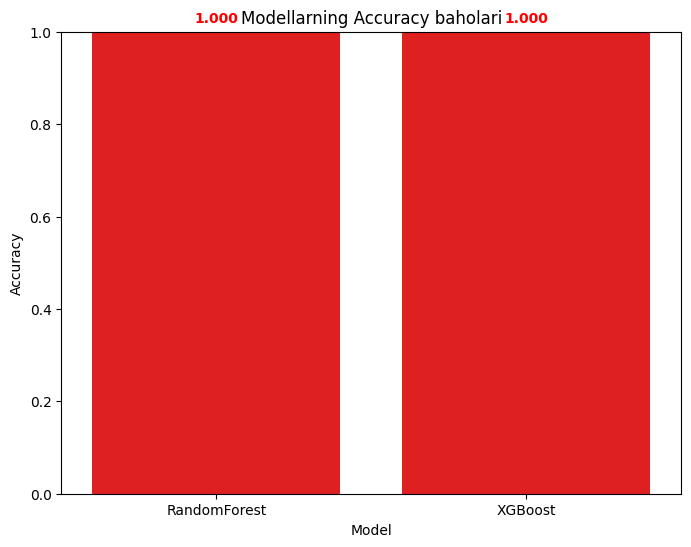

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 


results_df = pd.DataFrame({
    "Model": ["RandomForest", "XGBoost"],
    "Accuracy": [1.0, 1.0]
})

# Eng yuqori accuracy ni topamiz
max_acc = results_df["Accuracy"].max()

# Ranglar ro'yxati (qizil - eng yaxshisi, ko'k - boshqalari)
colors = results_df["Accuracy"].apply(lambda x: 'red' if x == max_acc else 'blue')

# Palette dictionary: model nomi -> rang
palette = dict(zip(results_df["Model"], colors))

plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette=palette)

plt.title("Modellarning Accuracy baholari")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Model")

# Bar ustiga qiymat yozish
for i, (acc, color) in enumerate(zip(results_df["Accuracy"], colors)):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', color=color, fontweight='bold')

plt.show()